# Objective: EDA
## To apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis on a dataset.

---

In [2274]:
# Import Necessary Libraries:

import pandas as pd                          # Importing pandas for data manipulation and analysis
import numpy as np                           # Importing numpy for numerical calculations
import matplotlib.pyplot as plt              # Importing matplotlib for data visualizations
import seaborn as sns                        # Importing seaborn for enhanced visualizations
import ppscore as pps                        # Importing Predictive Power Score to measure the relationship between variables

# Importing Preprocessing packages from sci-kit learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Importing Isolation Forest to detect anomalies (Outliers)
from sklearn.ensemble import IsolationForest

# Information on the Data:

---

In [2276]:
# Using pandas to upload and read the dataset:

df = pd.read_csv('adult_with_headers.csv')       # Reads the csv file
df.head()                                        # Display first 5 rows of the dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**As shown above, we are working on an Adult Census dataset**

In [2278]:
# Information of data:

df.info()            # Information of the dataset - rows,columns,null,datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**The data shows total 32561 rows with 15 columns and no null values**

In [2280]:
# Structure of the data:

df.shape                 # Number of rows, Number of columns

(32561, 15)

In [2281]:
# Checking Null values:

df.isnull().sum()         # Provides the count of null values in each column if any

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

**Dataset is clean, there no null values**

In [2283]:
# Checking duplicate values:

df.duplicated().sum()          # There are total 24 duplicate rows

24

In [2284]:
# Cleaning the duplicate rows:

df.drop_duplicates(inplace=True)              # Removes any and every duplicate values in the dataset

In [2285]:
# Descriptive Statistics on numerical data of the dataset:

round(df.describe(),2)                                             # Using describe to check the stats of the data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00
mean,38.59,189780.85,10.08,1078.44,87.37,40.44
std,13.64,105556.47,2.57,7387.96,403.10,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,236993.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


**The count of rows now shows 32537** 

**Average age of population in data lies between 38 - 39 with working hours per week at 40.44**

**Education level for average population stands at 10 which indicates people graduating the level from some college**

**More than 75% of the population have gained and lost zero capital, though have worked 45 hours a week**

**The dataset also shows the minimum education level as 1 indicating population with low level of literacy as well**

In [2287]:
# Calculating Counts for meaningful columns by creating a function to ease the process

def counts(data,columns):                   # Defining the function named counts(parameters)
    values = []                             # Created empty list to append results
    for col in columns:                     # For loop to iterate through every column
        counts = data[col].value_counts()   # Calculates value counts for all columns
        values.append([col,counts])         # Appends the counted values into the list named values

    return values[1:]                       # Returns all columns except for first(age)

In [2288]:
# Run the function to get results
counts(df,df.columns)

[['workclass',
   Private             22673
   Self-emp-not-inc     2540
   Local-gov            2093
   ?                    1836
   State-gov            1298
   Self-emp-inc         1116
   Federal-gov           960
   Without-pay            14
   Never-worked            7
  Name: workclass, dtype: int64],
 ['fnlwgt',
  164190    13
  123011    13
  203488    13
  148995    12
  113364    12
            ..
  138342     1
  158040     1
  232784     1
  325573     1
  257302     1
  Name: fnlwgt, Length: 21648, dtype: int64],
 ['education',
   HS-grad         10494
   Some-college     7282
   Bachelors        5353
   Masters          1722
   Assoc-voc        1382
   11th             1175
   Assoc-acdm       1067
   10th              933
   7th-8th           645
   Prof-school       576
   9th               514
   12th              433
   Doctorate         413
   5th-6th           332
   1st-4th           166
   Preschool          50
  Name: education, dtype: int64],
 ['education_num',

In [2289]:
# Display first 10 rows of data

df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2290]:
df.rename(columns={'fnlwgt':'final_weight'},inplace=True)

In [2291]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Visualization:

In [2293]:
# Display first 5 rows to view data:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2294]:
# Import Visual Libraries:
import matplotlib.pyplot as plt
import seaborn as sns

In [2295]:
# Checking distribution of numerical features in the data:
df_num = df.select_dtypes(include='number')                 # Only reflects numerical columns
df_num.head()                                               # Display 5 rows only

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [2296]:
# Creating a function to iterate through all columns and visualize the distribution

def plot(data,columns):                                # Defined function plot(parameters)
    for col in columns:                                # For loop to iterate
        plt.figure(figsize=(8,8))                      # Adjusted plot figure size

        sns.histplot(data=data,x=data[col],bins = 15,kde=True,palette='Set2')   # Visualize using histplot from seaborn
        
        # Calculate Skewness
        skewness = data[col].skew()

        # Skewness type
        if skewness >= 0.5:
            skew_text = 'Right Skewed →'
            text_x = data[col].max() - (data[col].max() * 0.4)  # Place text near to right
        elif skewness <= -0.5:
            skew_text = '← Left Skewed'
            text_x = data[col].min() + (data[col].max() * 0.1)  # Place text near to left
        else:
            skew_text = "Approximately Normally Distributed"
            text_x = data[col].median()                         # Center of the point

        # Add Annotation for skewness
        plt.text(text_x,plt.ylim()[1]*0.8, skew_text, fontsize=12, fontweight='bold', color='black')

        plt.title("Distribution Plot")
        plt.xlabel(f"Distribution of {col}", fontsize=12)
        
        plt.show()

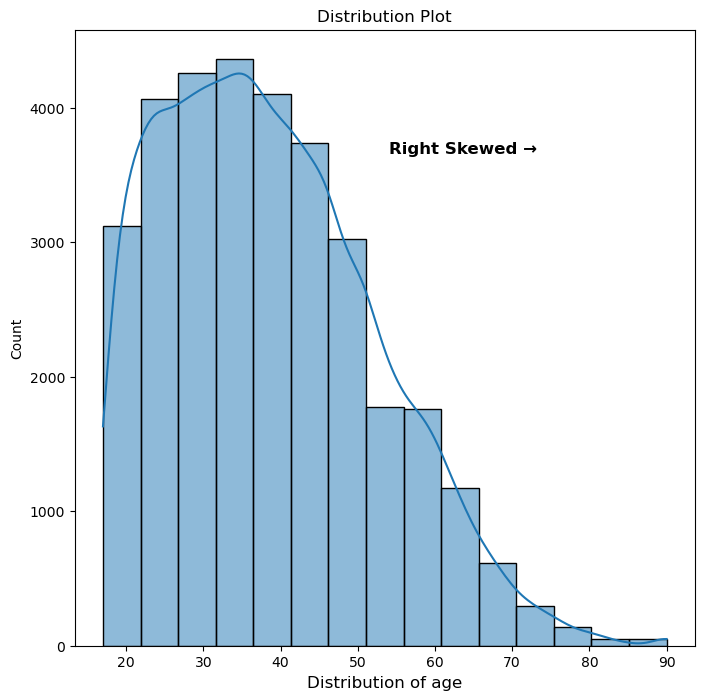

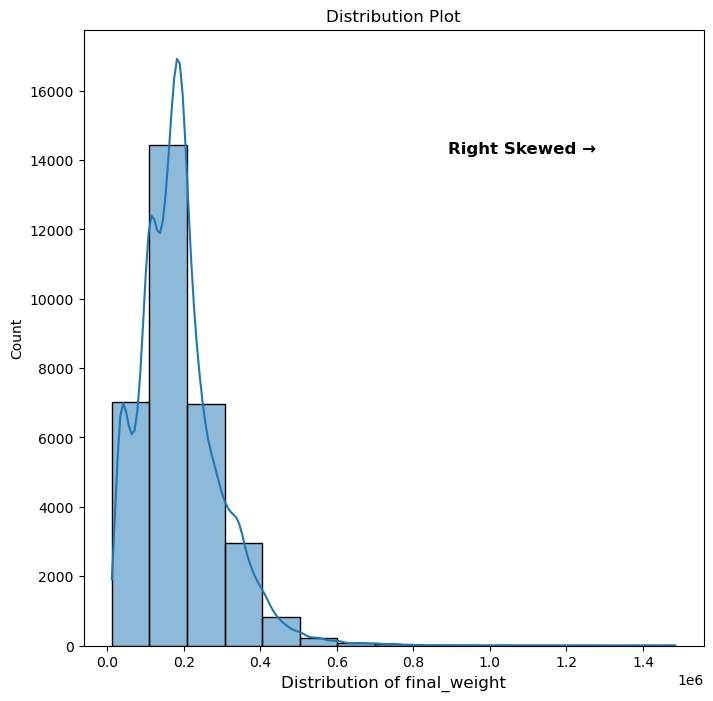

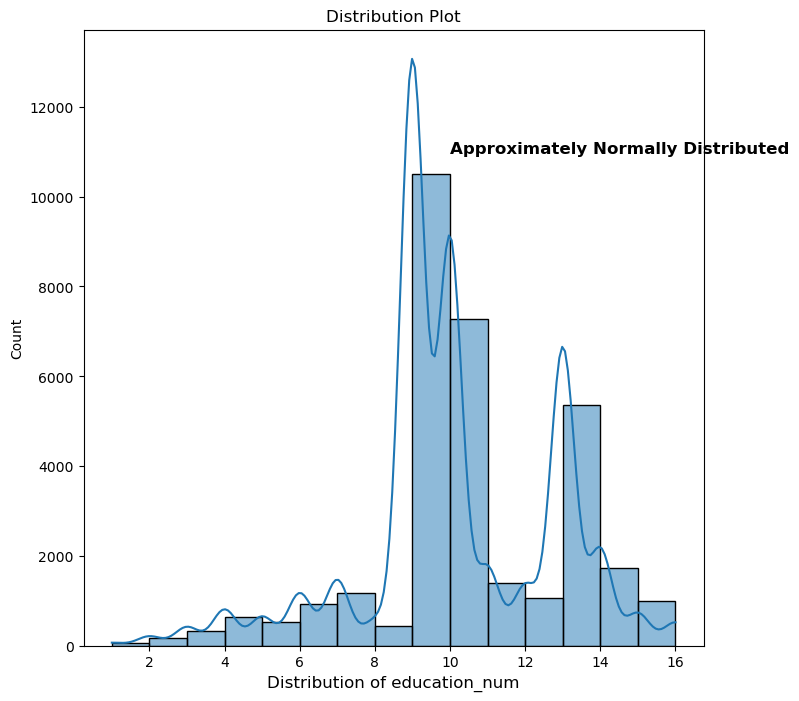

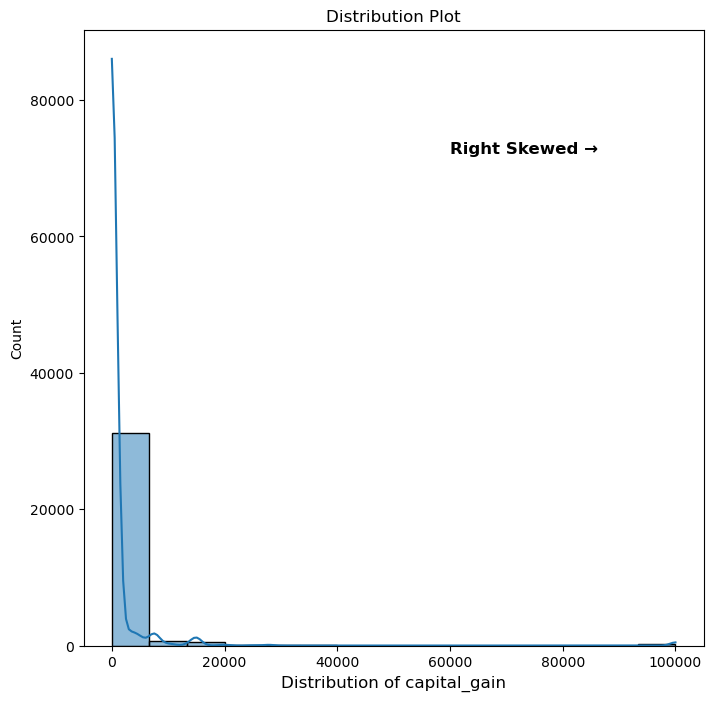

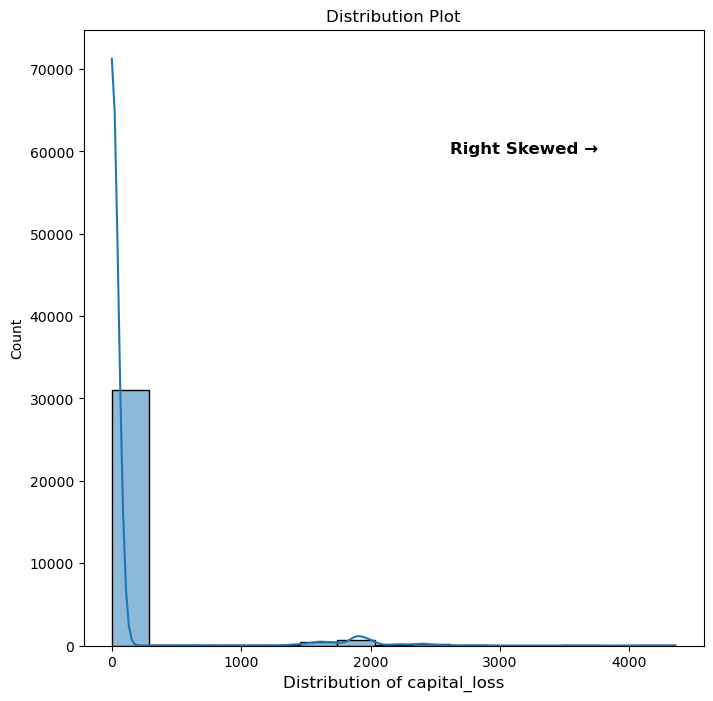

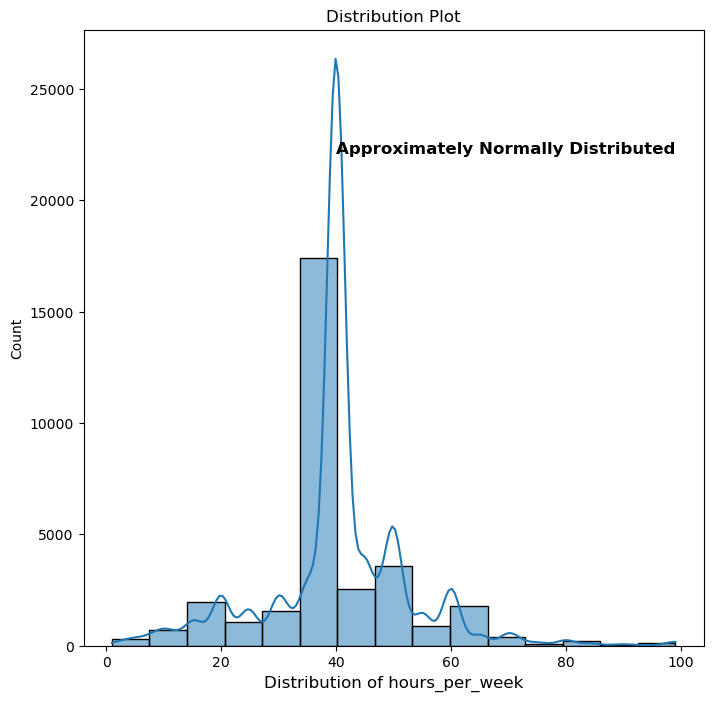

In [2297]:
plot(df_num,df_num.columns);

**Columns such as final weight, capital gain and capital loss are right skewed, however; will use log transformation on these columns to reduce skewness**

In [2299]:
import warnings
warnings.filterwarnings('ignore')

In [2300]:
# Choosing only categorical data to ease visualization codes: 
df_categorical = df.select_dtypes(include='object')

# Display first 5 rows
df_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [2301]:
# Creating a function with for loop to visualize all categorical columns

def countplot(data, columns):
    # Looping through each column in the provided columns list
    for col in columns:
        # Creating a new figure with a size of 15x8 inches for each column
        plt.figure(figsize=(15,8))
        
        # Creating the countplot for the current column using Seaborn
        ax = sns.countplot(data=data, x=data[col], palette='Set1')
        
        # Rotating x-axis tick labels to 90 degrees for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        # Looping through each bar (patch) in the countplot to add count labels on top
        for p in ax.patches:
            # Annotating each bar with its count (height of the bar)
            ax.annotate(f"{p.get_height()}", 
                        (p.get_x() + p.get_width()/2., p.get_height()),  # Position of the label (centered on top of the bar)
                        ha='center', va='center',  # Aligning the label in the center horizontally and vertically
                        fontsize=12, color='black',  # Setting label font size and color
                        xytext=(0, 10), textcoords='offset points')  # Adjusting the label position slightly above the bar
        
        # Setting the title for the plot
        plt.title('Countplot', fontsize=20)
        
        # Setting the x-axis label to indicate the counts for the current column
        plt.xlabel(f"Counts of {col}", fontsize=15)
        
        # Displaying the plot
        plt.show()

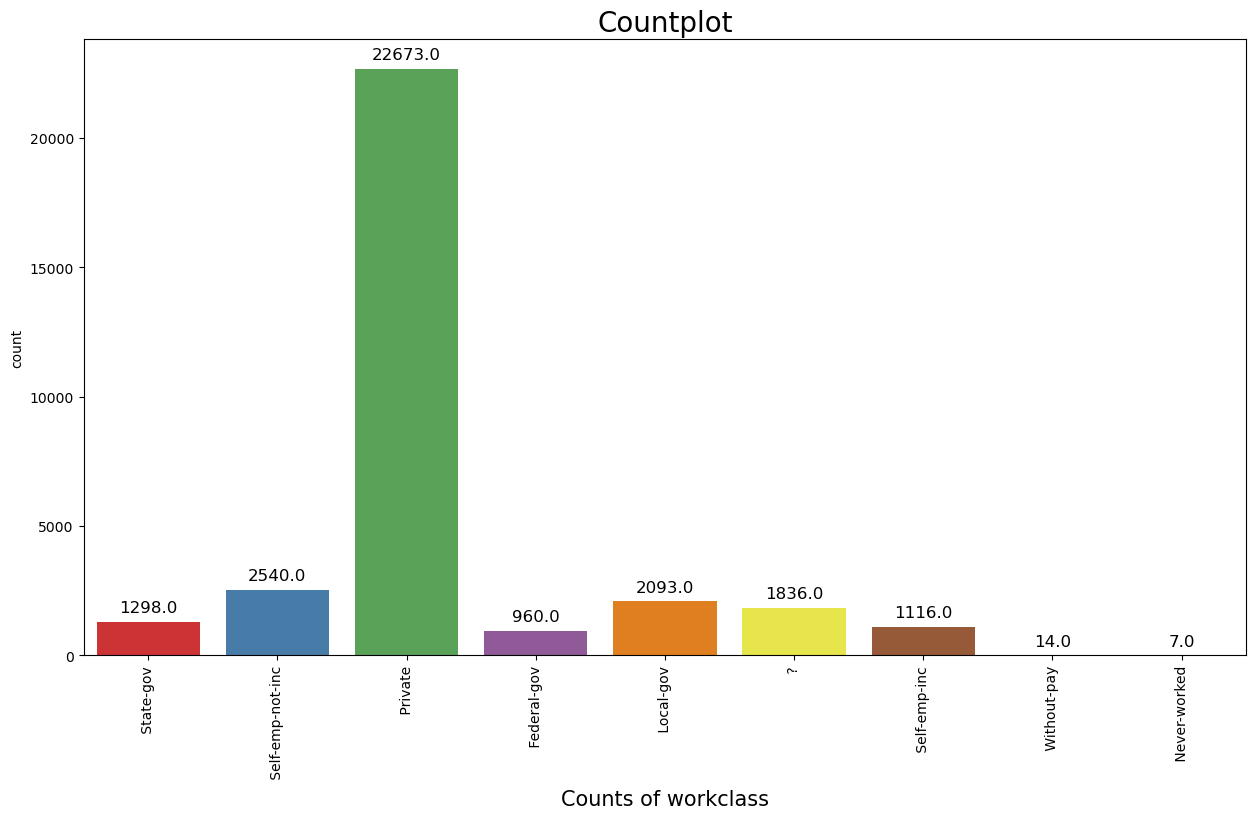

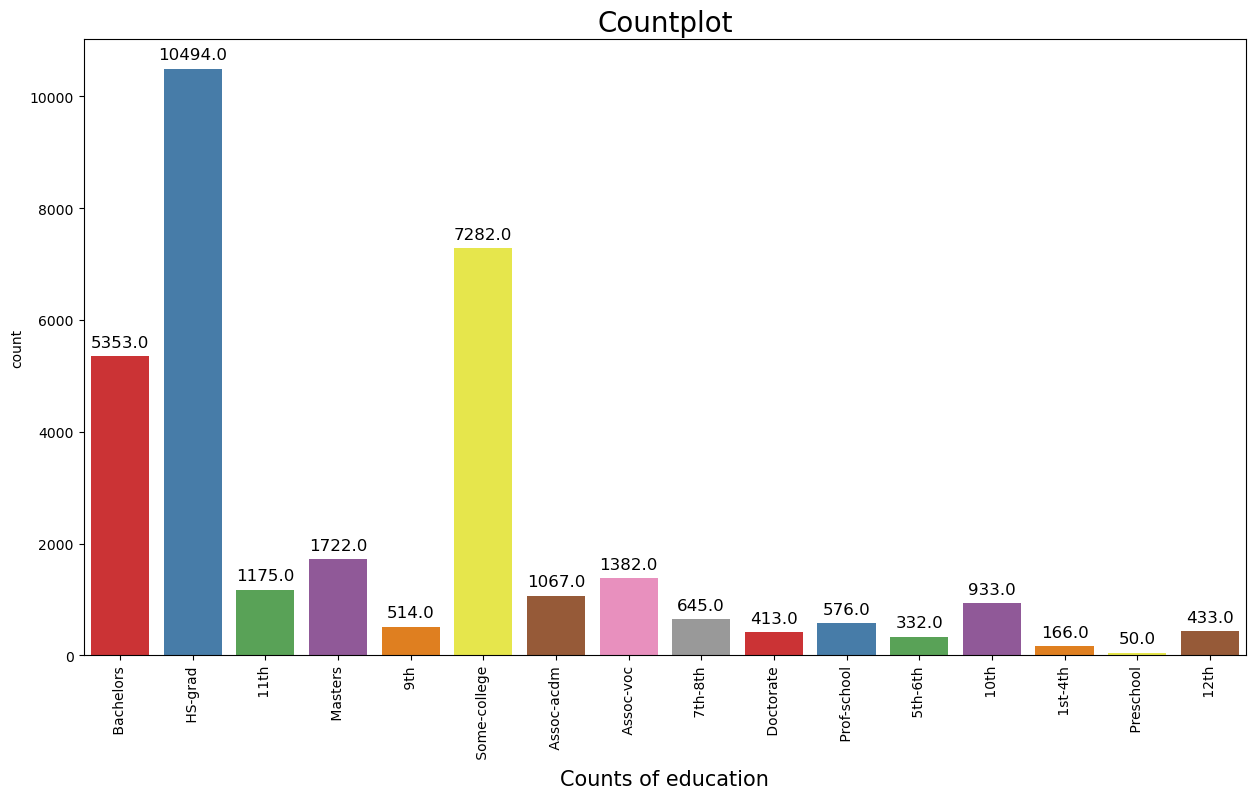

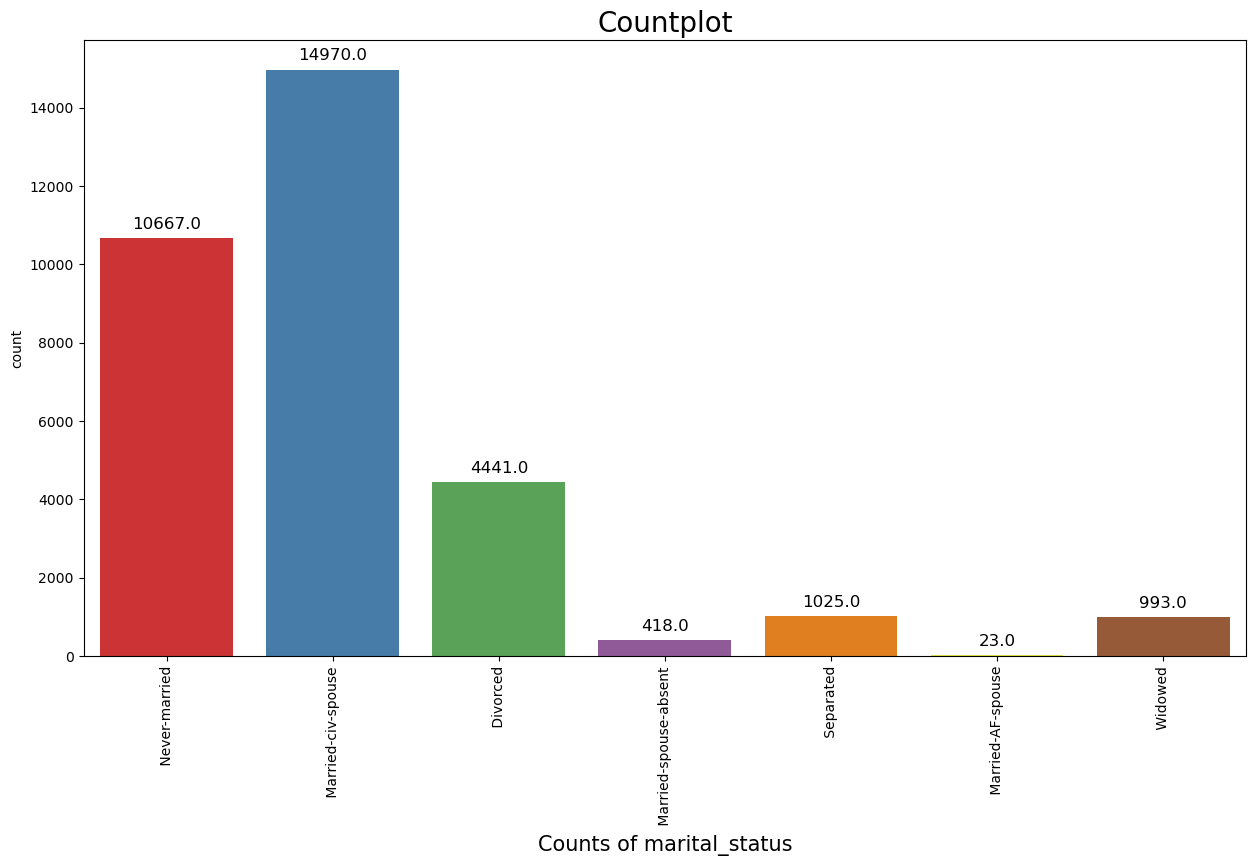

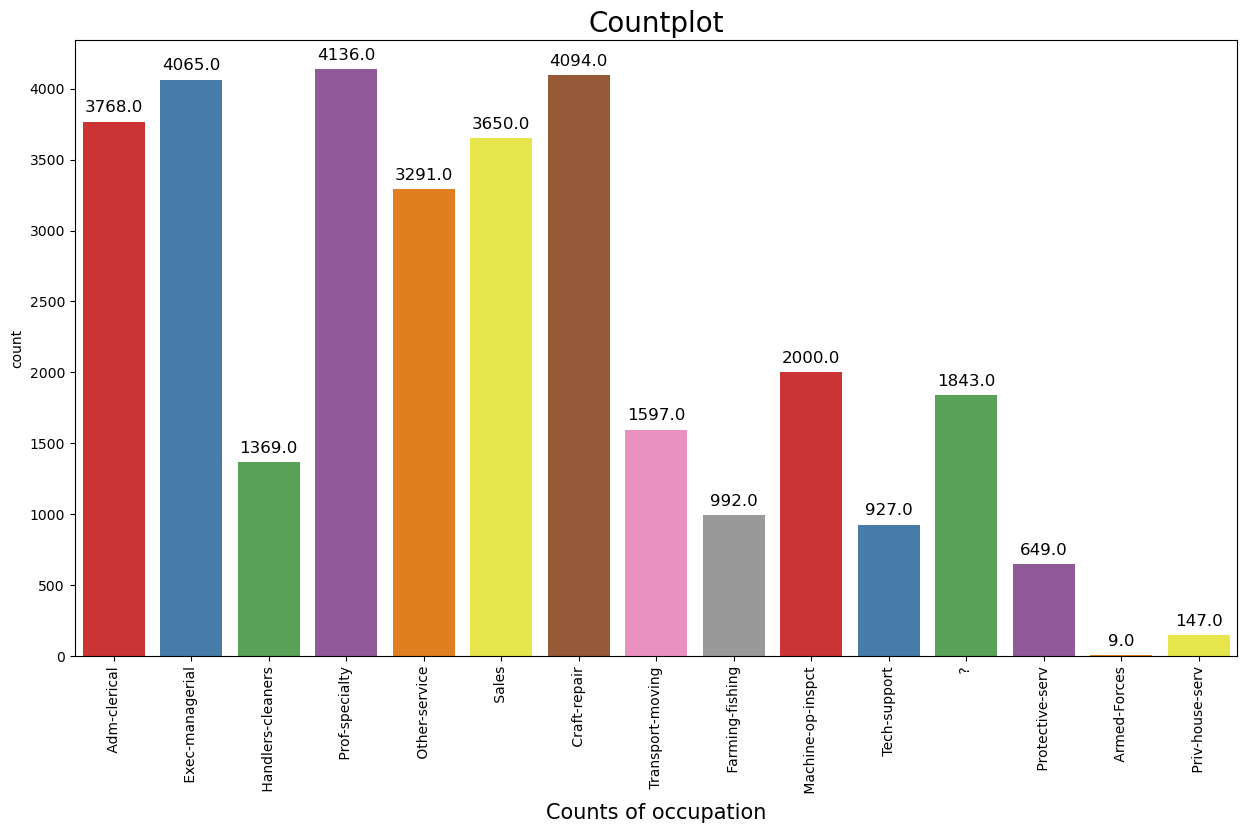

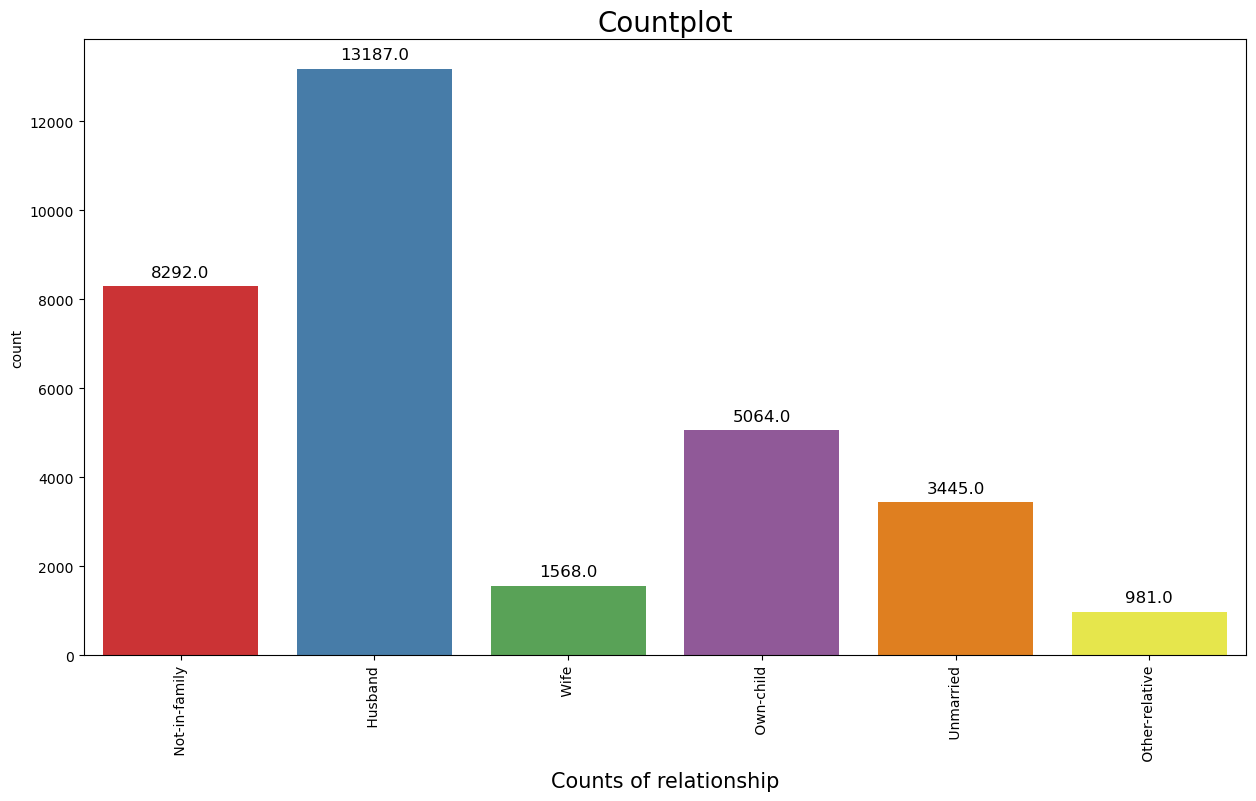

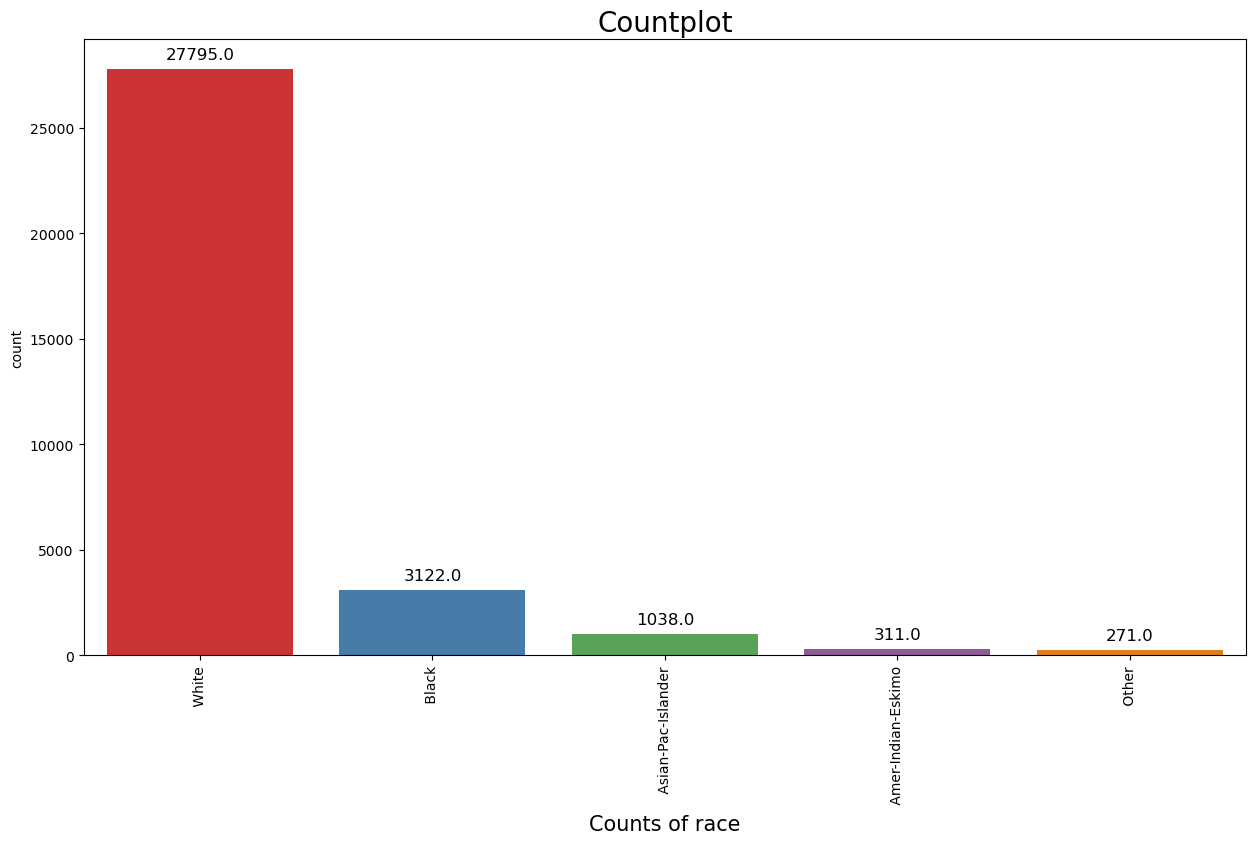

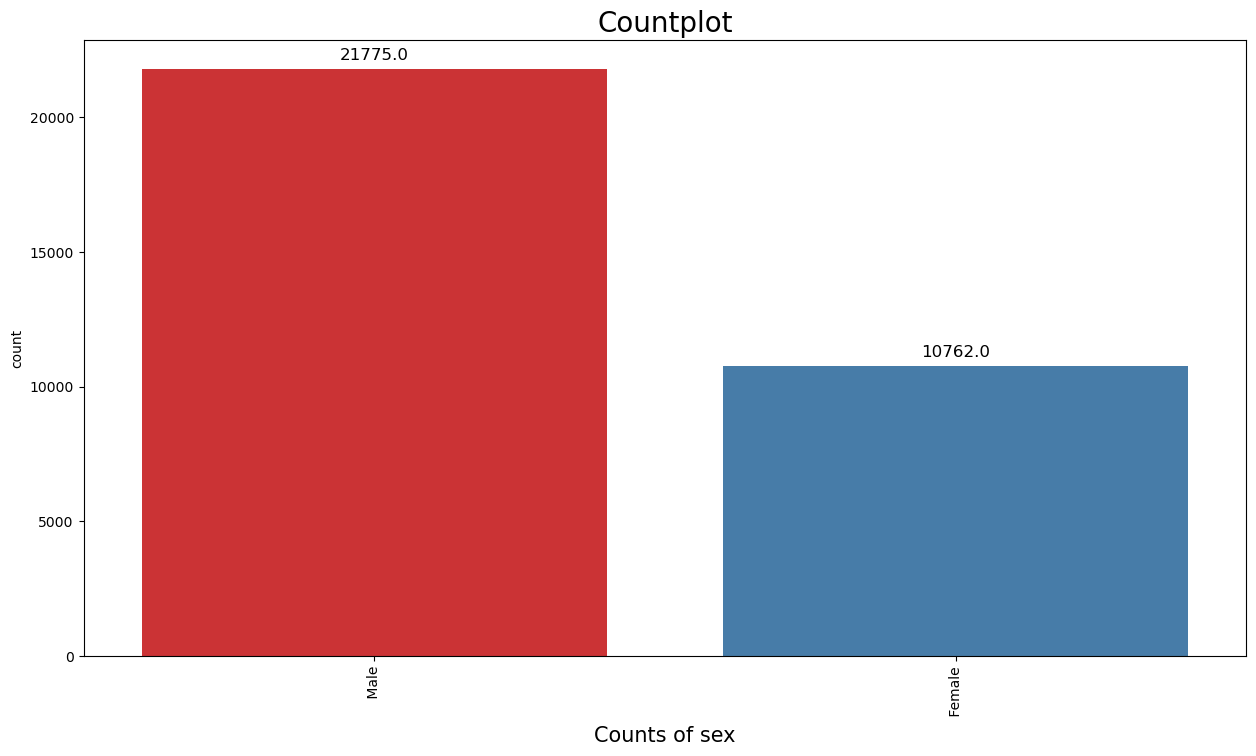

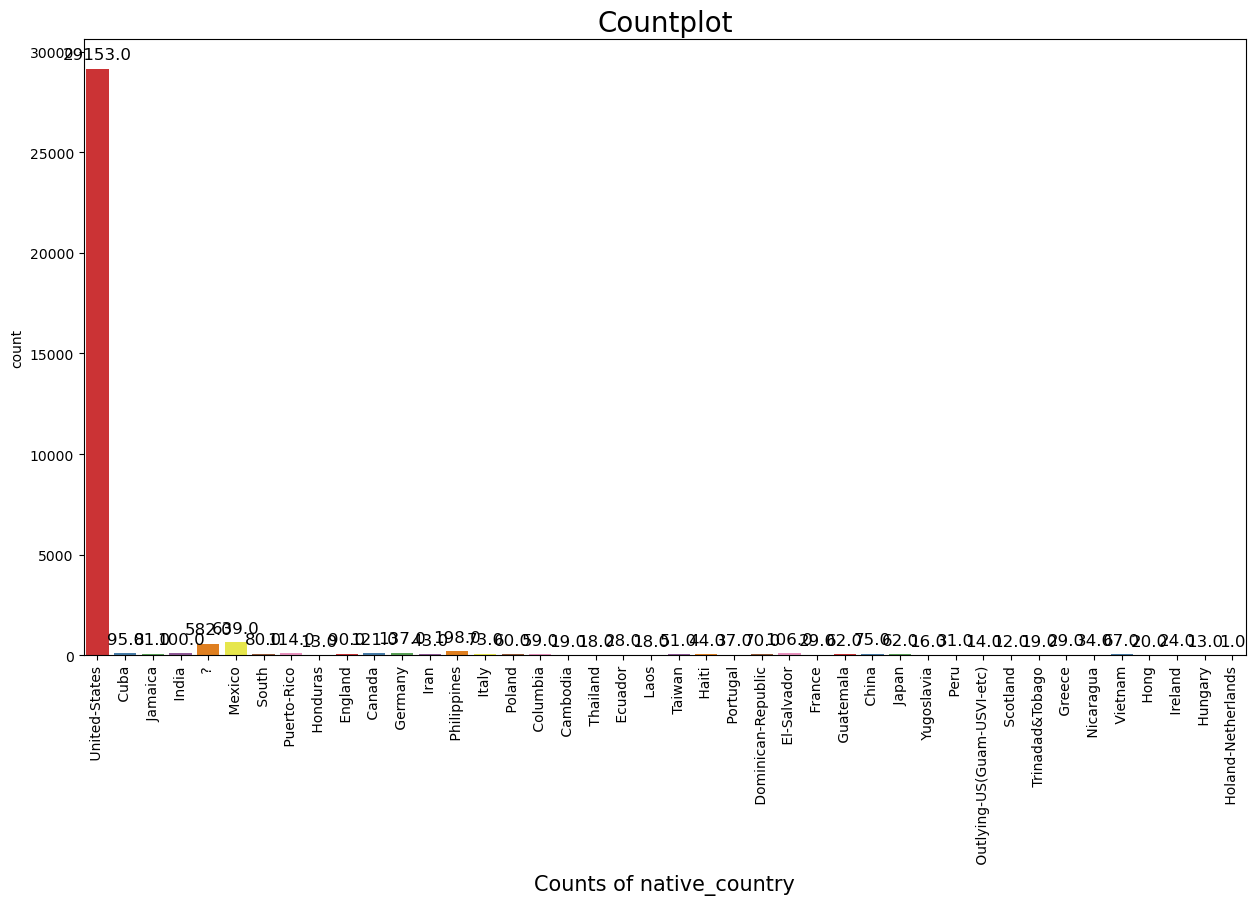

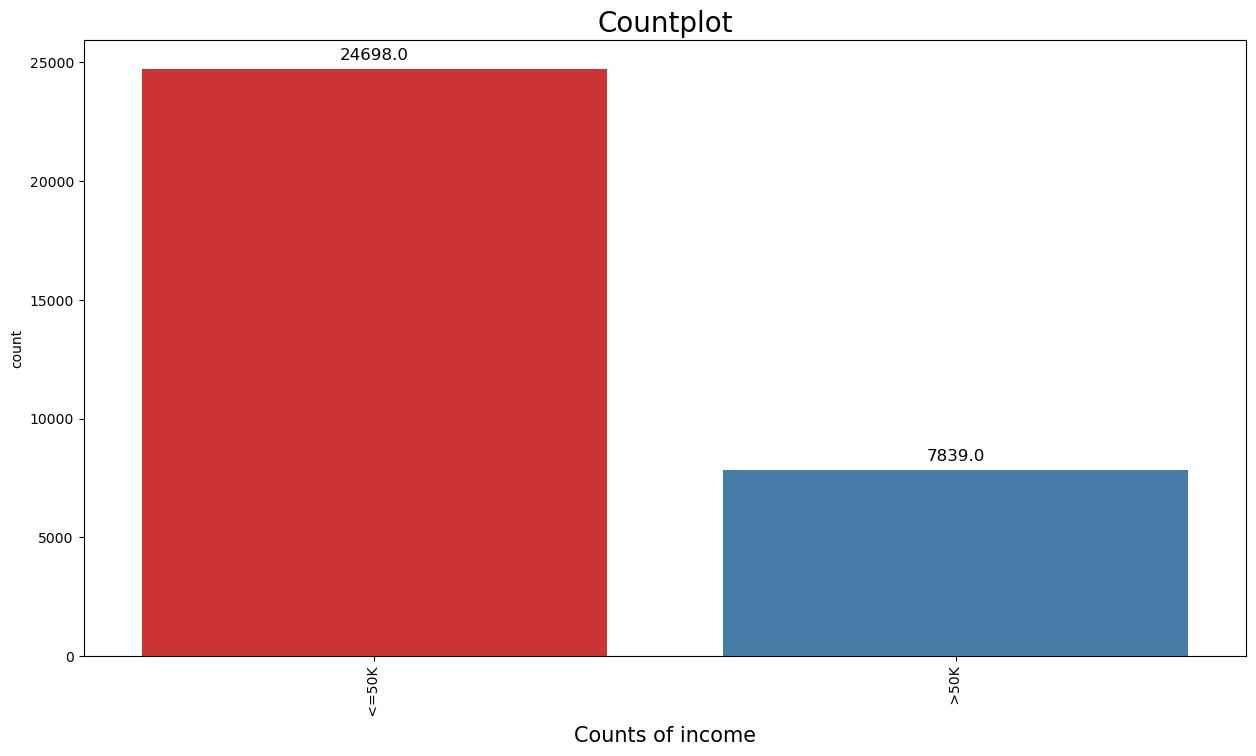

In [2302]:
countplot(df_categorical,df_categorical.columns)

**Insights:**

- **Workclass:** The most common category is "**Private**" which has a count of 22,673.
- **Education:** "**HS-Grad**" has the highest count at 10,494.
- **Marital Status:** The most frequent category is "**Married-Civ-Spouse**" with 14,970 occurrences.
- **Occupation:** "**Prof-Specialty**" is the most common occupation with 4,136 occurrences.
- **Relationship:** "**Husband**" appears most frequently, with 13,187 instances.
- **Race:** "**White**" is the most common race with 27,795 occurrences.
- **Sex:** "**Male**" is the most common gender with 21,775 occurrences.
- **Native Country:** "**United States**" has the highest count with 29,153 occurrences.
- **Income:** "**Less than 50K**" is the most frequent income category, with 24,698 occurrences.

# Outlier Detection:
---

In [2305]:
# Using Isolation Forest Algorithm, we will detect and treat outliers

from sklearn.ensemble import IsolationForest     # Importing the package

In [2306]:
# Initializing the algorithm
iforest = IsolationForest(random_state=42, contamination='auto')

In [2307]:
# Detecing outliers
outliers = iforest.fit_predict(df_num)   # Where 1 = Inliers, -1 = Outliers

In [2308]:
df['Outlier'] = outliers
df[df['Outlier'] == -1]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Outlier
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,-1
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K,-1
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K,-1
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K,-1
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32525,81,?,120478,Assoc-voc,11,Divorced,?,Unmarried,White,Female,0,0,1,?,<=50K,-1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,-1
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,-1
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K,-1


**After adding Outlier column into main DataFrame, there are total of 4109 rows that are anomalies(Outliers) and will filter it out**

In [2310]:
df = df[df['Outlier'] == 1]
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Outlier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [2311]:
df[df['Outlier']==-1]  # Dataset is cleaned of Outliers

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Outlier


In [2312]:
# Resetting the index after rows deletion(Outliers)
df.reset_index(drop=True, inplace=True)

In [2313]:
df.info()  # Info on cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28939 entries, 0 to 28938
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             28939 non-null  int64 
 1   workclass       28939 non-null  object
 2   final_weight    28939 non-null  int64 
 3   education       28939 non-null  object
 4   education_num   28939 non-null  int64 
 5   marital_status  28939 non-null  object
 6   occupation      28939 non-null  object
 7   relationship    28939 non-null  object
 8   race            28939 non-null  object
 9   sex             28939 non-null  object
 10  capital_gain    28939 non-null  int64 
 11  capital_loss    28939 non-null  int64 
 12  hours_per_week  28939 non-null  int64 
 13  native_country  28939 non-null  object
 14  income          28939 non-null  object
 15  Outlier         28939 non-null  int32 
dtypes: int32(1), int64(6), object(9)
memory usage: 3.4+ MB


In [2314]:
# Once the outliers are detected and treated, we can drop the Outlier column:
df.drop('Outlier',axis=1,inplace=True)
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---

Q) How outliers affect model performance?
---
-> Outliers can cause the model to learn extreme values, leading to poor generalization and inaccurate predictions. Outliers introduce noise, biasing the model, increasing the risk of overfitting, and affecting models that rely on distance metrics or parametric assumptions.
---
---

In [2316]:
# Updating df_num and df_categorical
df_num = df.select_dtypes(include='number')
df_categorical = df.select_dtypes(include='object')

# Feature Transformation

---

In [2318]:
df_num.drop('age',axis=1,inplace=True)
df_num

,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,77516,13,2174,0,40
1,83311,13,0,0,13
2,215646,9,0,0,40
3,234721,7,0,0,40
4,338409,13,0,0,40
...,...,...,...,...,...
28934,310152,10,0,0,40
28935,257302,12,0,0,38
28936,154374,9,0,0,40
28937,151910,9,0,0,40


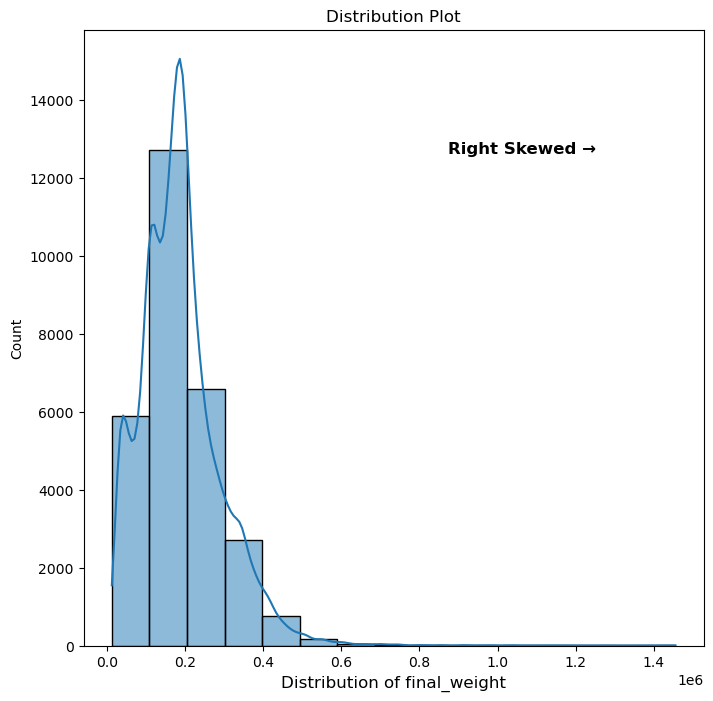

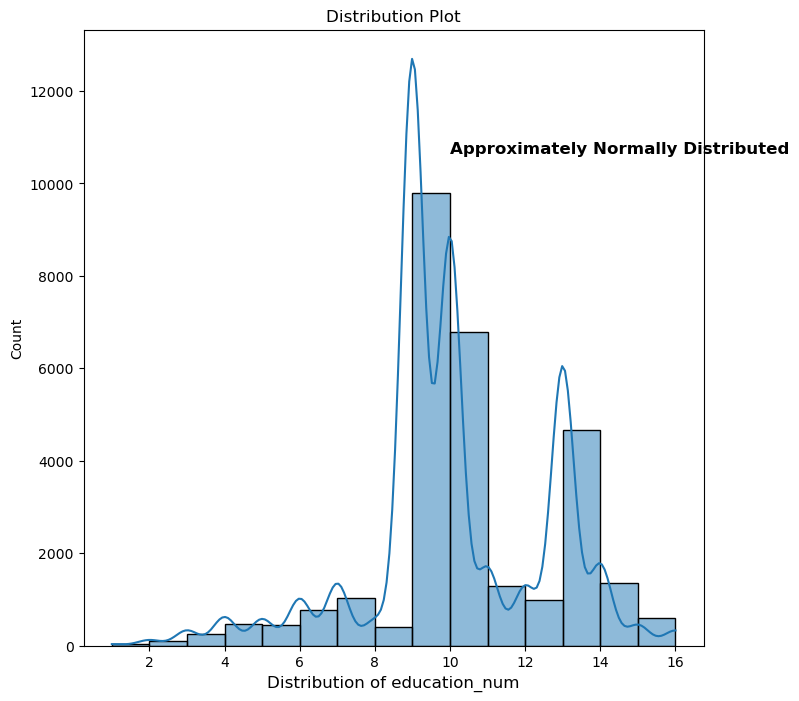

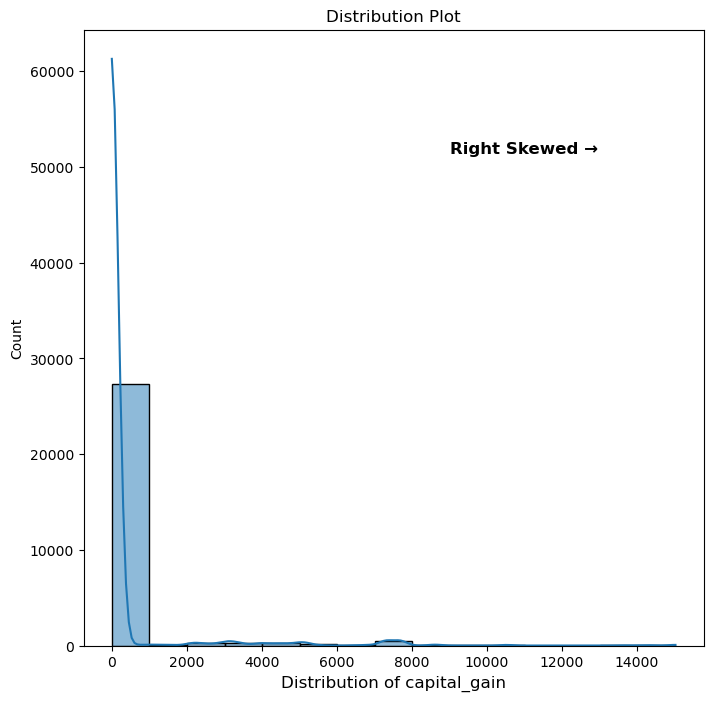

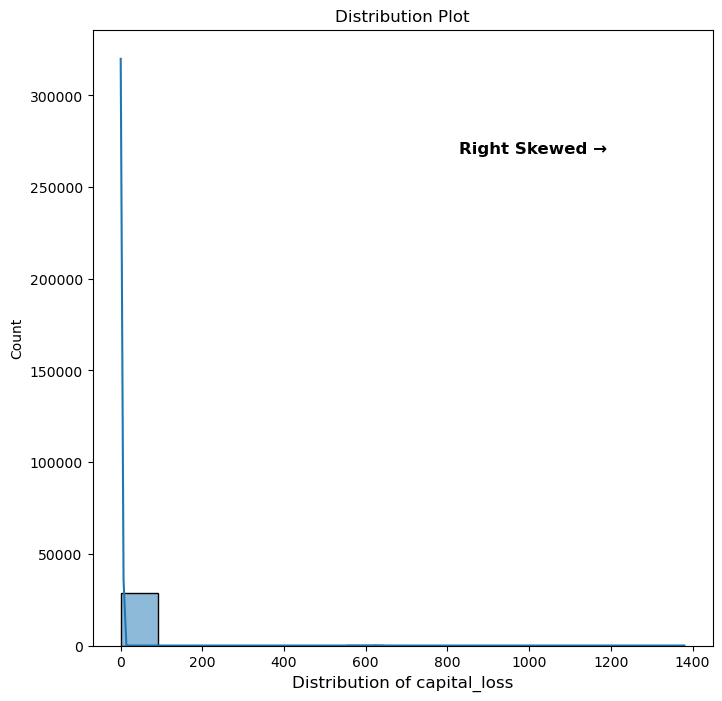

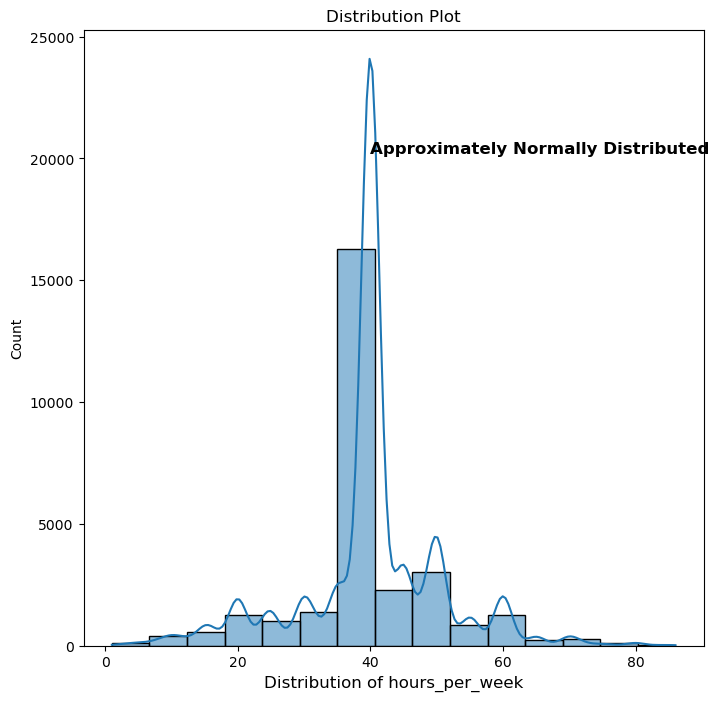

In [2319]:
plot(df_num,df_num.columns)

**The distribution shows right skewed for columns:**
- final_weight
- capital_gain
- capital_loss

**Even though capital_gain and capital_loss columns are right skewed, transforming these columns won't make sense as most of the values are 0 which represent no gain or no loss data**

**Will use Log Transformation on the right skewed columns [ final_weight ] to normalize**

In [2321]:
# Skewness Threshold
rightskew = 0.5

# Measuring skewness on entire df_num
skewness = df_num.skew()

# Using for loop to check all columns skewness with threshold value
for col, skew in skewness.items():
    if  skew >= rightskew:
        print(f'{col}: It is right skewed')
    else:
        print(f'{col}: Normal')

final_weight: It is right skewed
education_num: Normal
capital_gain: It is right skewed
capital_loss: It is right skewed
hours_per_week: Normal


### Applying Log Transformation:

In [2323]:
# Importing Numpy package:
import numpy as np

# Using log10 to transform the skewness of column - final_weight
df_num['final_weight'] = np.sqrt(df_num['final_weight'])

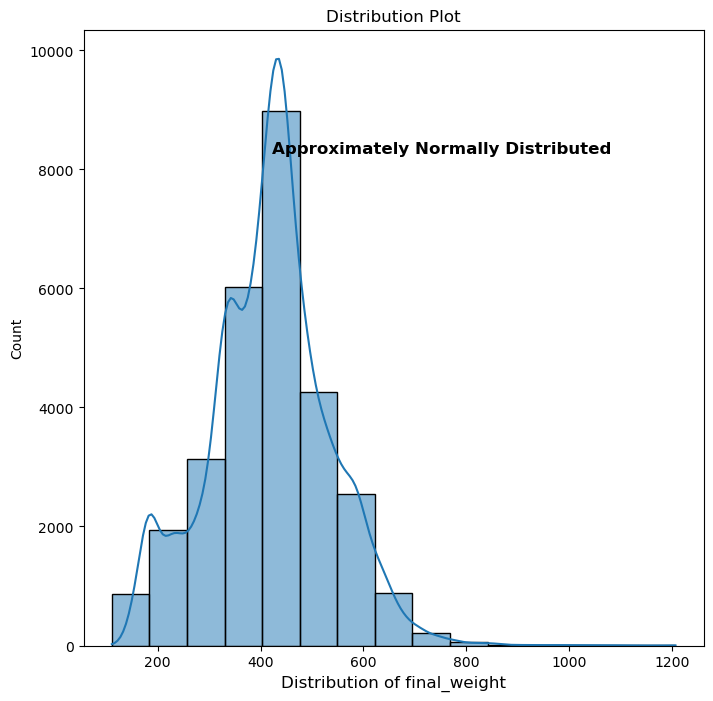

In [2324]:
plot(df_num,df_num[['final_weight']])

In [2325]:
# Replacing the transformed values in df
df['final_weight'] = df_num['final_weight']
df

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,22,Private,556.912920,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
28935,27,Private,507.249446,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
28936,40,Private,392.904569,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
28937,58,Private,389.756334,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Feature Scaling

---

**Scaling numerical features into a proper range is essential for ML models to prevent the model from being bias or else can lead to poor
prediction and/or model may favor to features having vast amount of values**

---
Q) Scenarios where each of the scaling is preferred and why?
---
-> **Standard Scaler** is used when dataset has continuous variable and when using ML models such as **Logistic Regression, SVM, KNN**. Standardization is the preferred method as ML models are sensitive to the scale of the features and Standard Scaler substracts the mean and dividing by the standard deviation - **ensures all features have a mean of 0 and standard deviation 1**. This method ensures the model is not biased towards the features having a large scale. Should be used when features have different scales such as column1 range - in thousands and column2 range - between 20 and 80.
---
-> **MinMax Scaler** is a method that brings all the features in a **fixed range between 0 - 1**. It is useful and preferred when working with models senstive to the absolute magnitudes of the values. Eg- Neural Networks. This method is preferred whenever the features are already bounded within a known range or need a fixed range. 
---
---

Since the dataset we're currently working on has continuous variables with very different ranges between columns, we will use the Standard Scaler to ensure that each feature is centered around 0 and has a standard deviation of 1. This will help prevent features with larger ranges from dominating the model and improve the performance of algorithms sensitive to feature scales.

In [2330]:
# Display few rows
df_num.head()

,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,278.416954,13,2174,0,40
1,288.636450,13,0,0,13
2,464.377002,9,0,0,40
3,484.480134,7,0,0,40
4,581.729318,13,0,0,40


In [2331]:
# Importing libraries:
from sklearn.preprocessing import StandardScaler

# Initialize the Scaler:
sc = StandardScaler()

In [2332]:
# Scaling the features where fit learns the features and transforms it bringing all values into a desirable range
df_num_scaled = sc.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled,columns = df_num.columns)
df_num_scaled.head()

,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,-1.201950,1.228291,1.352417,-0.03235,-0.015913
1,-1.114211,1.228291,-0.214116,-0.03235,-2.558102
2,0.394599,-0.433996,-0.214116,-0.03235,-0.015913
3,0.567194,-1.265140,-0.214116,-0.03235,-0.015913
4,1.402121,1.228291,-0.214116,-0.03235,-0.015913


# Feature Encoding

---

### We will use One Hot and Label Encoding as follows:
- Apply One-Hot Encoding to categorical variables with less than 5 categories.
- Use Label Encoding for categorical variables with more than 5 categories.

In [2335]:
# Display categorical dataframe:
df_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


**Income column is the target variable, so we will drop the column now and apply encoding on rest of the columns**

In [2337]:
df_categorical.drop('income',axis=1,inplace=True)
df_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [2338]:
# Will run a function to check which column requires One Hot encoding and which column Label Encoding:

def count_category(data,columns):     # Defined function count_category(parameters)
    count = 5                         # Threshold count
    for col in columns:               # Uses for loop to iterate columns
        if len(data[col].unique()) < count:               # Checks for columns having categories less than threshold value 
            print(f'One Hot Encoding Needed for {col}')   # If less than threshold - should print One hot encoding needed
        else:
            print(f'Label Encoding Needed for {col}')     # If more than the threshold - should print Label encoding needed

In [2339]:
# Call the function:
count_category(df_categorical,df_categorical.columns)

Label Encoding Needed for workclass
Label Encoding Needed for education
Label Encoding Needed for marital_status
Label Encoding Needed for occupation
Label Encoding Needed for relationship
Label Encoding Needed for race
One Hot Encoding Needed for sex
Label Encoding Needed for native_country


**Except for Sex Column, all other columns needs to be Label Encoded**

In [2341]:
# Importing the packages:
from sklearn.preprocessing import LabelEncoder

In [2342]:
# Initializing the encoders:
le = LabelEncoder()          # Label Encoder

In [2343]:
# Storing into a new variable called as encoded 
df_categorical_encoded = pd.DataFrame(df_categorical,columns=df_categorical.columns)

In [2344]:
# Apply pd.get_dummies to the 'sex' column
df_categorical_encoded = pd.get_dummies(df_categorical,columns=['sex'])
df_categorical_encoded

,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Female,sex_ Male
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States,0,1
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States,0,1
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States,0,1
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States,0,1
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba,1,0
...,...,...,...,...,...,...,...,...,...
28934,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,United-States,0,1
28935,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States,1,0
28936,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States,0,1
28937,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States,1,0


In [2345]:
# Applying Label Encoding on rest of the columns:
df_categorical_encoded['workclass'] = le.fit_transform(df_categorical_encoded['workclass'])
df_categorical_encoded['education'] = le.fit_transform(df_categorical_encoded['education'])
df_categorical_encoded['marital_status'] = le.fit_transform(df_categorical_encoded['marital_status'])
df_categorical_encoded['occupation'] = le.fit_transform(df_categorical_encoded['occupation'])
df_categorical_encoded['relationship'] = le.fit_transform(df_categorical_encoded['relationship'])
df_categorical_encoded['race'] = le.fit_transform(df_categorical_encoded['race'])
df_categorical_encoded['native_country'] = le.fit_transform(df_categorical_encoded['native_country'])

# Display the encoded Dataframe

In [2346]:
df_categorical_encoded

,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Female,sex_ Male
0,7,9,4,1,1,4,38,0,1
1,6,9,2,4,0,4,38,0,1
2,4,11,0,6,1,4,38,0,1
3,4,1,2,6,0,2,38,0,1
4,4,9,2,10,5,2,5,1,0
...,...,...,...,...,...,...,...,...,...
28934,4,15,4,11,1,4,38,0,1
28935,4,7,2,13,5,4,38,1,0
28936,4,11,2,7,0,4,38,0,1
28937,4,11,6,1,4,4,38,1,0


---
Q) Discuss the Pros and Cons of One-hot encoding and Label encoding?
---
-> **One Hot Encoding**
 - **Pros:**
 - Works well for categorical data with no ordinal relationships
 - Suitable for models like Neural Networks and KNN
 - Makes categories more interpretable

 - **Cons:**
 - Increases dimensionality, leading to higher memory usage
 - Slower due to multiple binary columns
 - Poor scalability with high cardinality features
-------------------
-> **Label Encoding**
 - **Pros:**
 - Efficient in terms of memory and computation
 - Works well with tree based algorithms (XGBoost, Random Forest)
 - Scales better with high cardinality features

 - **Cons:**
 - Imposes an ordinal relationship which misleads non-tree based models
 - Less interpretable for non-ordinal categorical features.
---

In [2348]:
# **Feature**                 **One-Hot Encoding**                                                 **Label Encoding**
# When to Use                 No ordinal relationship                                              Ordinal relationship exists
# Output                      Multiple binary columns                                              Single integer column
# Memory Usage                High (increases dimensionality)                                      Low (doesn’t increase dimensionality)
# Model Compatibility         Works well with non-tree-based models (e.g., Neural Networks, KNN)   Works well with tree-based models (e.g., Random Forest)
# Speed                       Slower due to increased features                                     Faster (only one column)
# Interpretability            Easy to interpret (one column per category)                          Harder to interpret for non-ordinal data
# Scalability                 Poor for high cardinality                                            Efficient for high cardinality

# Feature Engineering
---

In [2350]:
# Display the original dataframe
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2351]:
# Removing any leading or trailing spaces
def strip(data,columns):
    for col in columns:
        data[col] = data[col].str.strip()
    return data

In [2352]:
df = strip(df,df[['workclass','education','marital_status','relationship','race','sex','native_country','income']])

In [2353]:
df

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28934,22,Private,556.912920,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
28935,27,Private,507.249446,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
28936,40,Private,392.904569,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
28937,58,Private,389.756334,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Creating 3 new features for the model performance:

---
**1. Work Hour Category:**

 - This feature will group individuals per working hours into different categories (Part-time, Full-time, Over-time)
 - Working fewer or more hours may have a direct impact on income.
 - Helps models capture income differences between part-time and full-time workers.

In [2356]:
# Define a function to create the feature:
def work_hour_category(hours):
    if hours < 20:                         # Part-Time for less than 20 hours per week
        return "Part-Time"
    elif 20 <= hours <= 40:                # Full-Time between 20 and 40 hours per week
        return "Full-Time"
    else:
        return "Over-Time"                 # Anything above 40 hours is considered Over-Time

In [2357]:
# Apply the function onto the dataframe on a new column
df['work_hours_category'] = df['hours_per_week'].apply(work_hour_category)

In [2358]:
# Check the new feature
df[['hours_per_week','work_hours_category']].head()

,hours_per_week,work_hours_category
0,40,Full-Time
1,13,Part-Time
2,40,Full-Time
3,40,Full-Time
4,40,Full-Time


---
**2. Experience Years (Based on Age & Education):**
 - This feature estimates experience level based on age and education assuming jobs were started after education
 - Calculation for this feature:
   - Experience = Age - Years of Education - 6 (substracting 6 because assuming education starts at age 6)
   - Substracting Years of education because those years spent learning rather than getting work experience

In [2360]:
# Creating feature using calculation:
df['experience_years'] = df['age'] - df['education_num'] - 6

# To ensure there no negative values:
df['experience_years'] = df['experience_years'].apply(lambda x: max(x,0))

In [2361]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,work_hours_category,experience_years
0,39,State-gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Full-Time,20
1,50,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Part-Time,31
2,38,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Full-Time,23
3,53,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Full-Time,40
4,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Full-Time,9


---
**3. Experience Level (Based on Experience Years):**
 - This feature will work on experience_years and categorizing levels such as "Entry-Level","Mid-Level","Senior-Level","Expert-Level".
 - It helps the model understand the impact of experience on income predictions by grouping individuals into meaningful categories.

In [2363]:
# Creating a function to build the feature Experience Level:
def explevel(experience_years):
    if experience_years <= 15:
        return "Entry-Level"
    elif 16 <= experience_years <= 30:
        return "Mid-Level"
    elif 31 <= experience_years <= 55:
        return "Senior-Level"
    else:
        return "Expert-Level"

In [2364]:
# Applying the function to get the third feature:
df['level_of_seniority'] = df['experience_years'].apply(explevel)

In [2365]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,work_hours_category,experience_years,level_of_seniority
0,39,State-gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Full-Time,20,Mid-Level
1,50,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Part-Time,31,Senior-Level
2,38,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Full-Time,23,Mid-Level
3,53,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Full-Time,40,Senior-Level
4,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Full-Time,9,Entry-Level


---
**work_hours_category:**

 - Helps capture the relationship between work hours and income levels.
 - Categorizing work hours (e.g., Part-Time, Full-Time, Over-Time) makes it easier for the model to differentiate working patterns.

**experience_years:** 

 - Represents real-world experience, which often correlates with income.
 - More experience may indicate higher skills, promotions, and increased salary potential.

**level_of_seniority:** 

 - Groups individuals into Entry-Level, Mid-Level, Senior-Level, and Expert-Level based on experience.
 - Helps the model understand career progression and its impact on income.

# Feature Selection ( PPScore v/s Correlation Matrix )

In [2368]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,work_hours_category,experience_years,level_of_seniority
0,39,State-gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Full-Time,20,Mid-Level
1,50,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Part-Time,31,Senior-Level
2,38,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Full-Time,23,Mid-Level
3,53,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Full-Time,40,Senior-Level
4,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Full-Time,9,Entry-Level


In [2369]:
# Importing the package:
import ppscore as pps

In [2370]:
# Calculating ppscore on df
pps_matrix = pps.matrix(df).round(2)

In [2371]:
# Extracting only relevant columns for readability
pps_matrix = pps_matrix[['x','y','ppscore']]

In [2372]:
# Display top features most predictive of "income"
pps_matrix[pps_matrix['y'] == 'income'].sort_values(by='ppscore',ascending=False)

,x,y,ppscore
266,income,income,1.00
194,capital_gain,income,0.21
68,education,income,0.16
86,education_num,income,0.16
248,native_country,income,0.01
14,age,income,0.00
302,experience_years,income,0.00
284,work_hours_category,income,0.00
230,hours_per_week,income,0.00
212,capital_loss,income,0.00


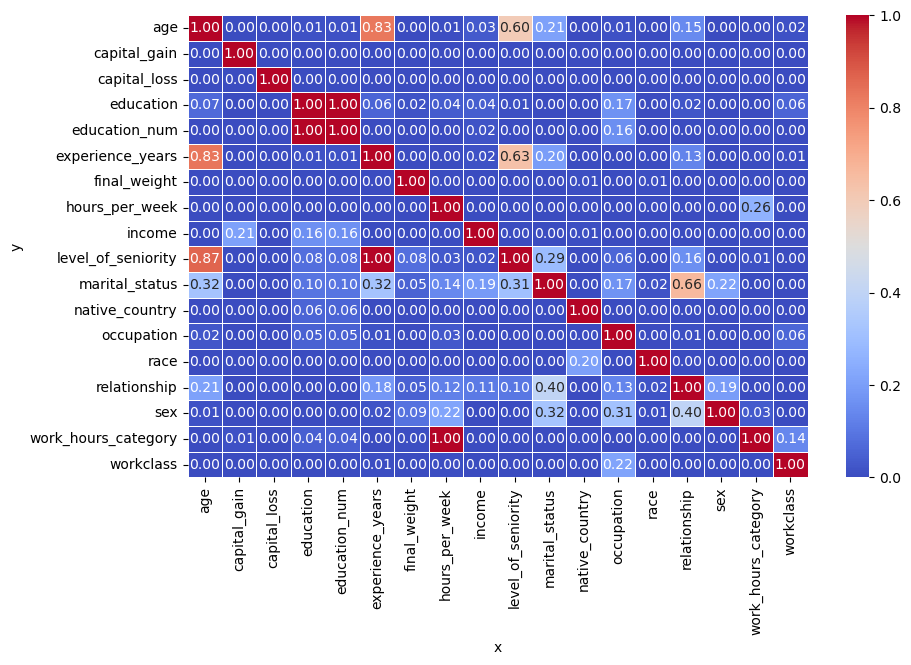

In [2373]:
# Compute ppscore matrix
pps_matrix = pps.matrix(df)[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')

# Set up plot size
plt.figure(figsize=(10,6))

# Create the heatmap
sns.heatmap(pps_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

# Show the plot
plt.show()

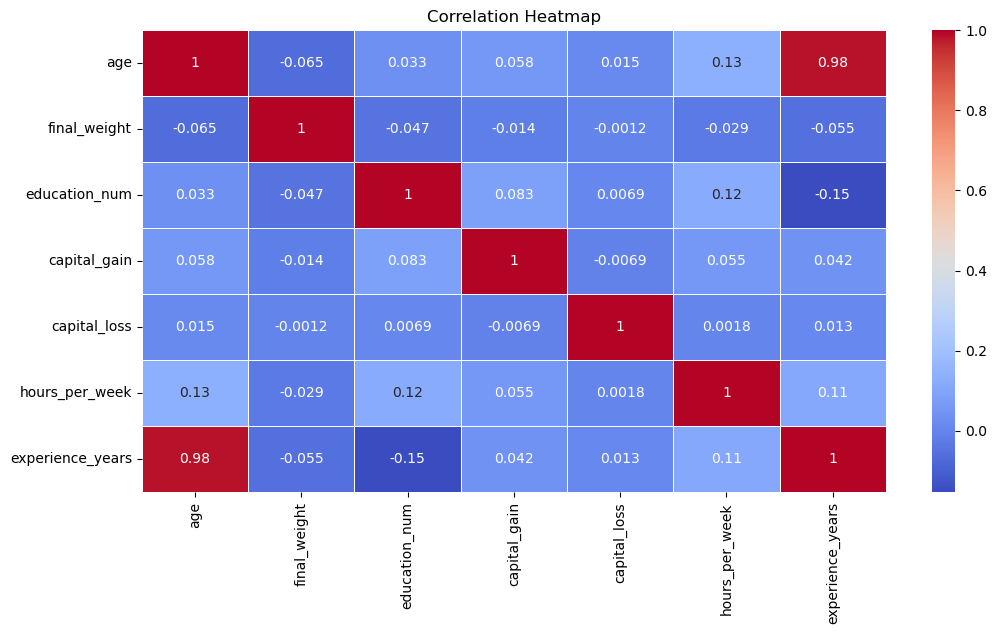

In [2374]:
# Using Correlation Matrix to find correlation between features and target
corr = df.corr()

# Visualizing the correlation
plt.figure(figsize=(12,6))
sns.heatmap(data=corr, annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Selected Features:
- experience_years
- education_num
- hours_per_week
- capital gain
- capital loss
- level_of_seniority
- relationship
- marital_status

**Conclusion: Findings vs. Correlation Matrix**

- The correlation matrix confirms many expected relationships, such as age vs. experience and marital status vs. relationship type.
- However, some expected strong correlations are weaker than anticipated (e.g., education vs. income, hours worked vs. income).
- Certain variables, like capital_gain and capital_loss, show no correlation, highlighting that financial patterns are more complex than just gains and - losses occurring together.
- Income appears to be influenced by multiple factors rather than a single dominant one, requiring further analysis (e.g., regression modeling).
---

In [2377]:
df_encoded = df.copy()

In [2378]:
df_encoded = df_encoded[['experience_years','education_num','hours_per_week','capital_gain','capital_loss','level_of_seniority','relationship','marital_status']]
df_encoded.head()

,experience_years,education_num,hours_per_week,capital_gain,capital_loss,level_of_seniority,relationship,marital_status
0,20,13,40,2174,0,Mid-Level,Not-in-family,Never-married
1,31,13,13,0,0,Senior-Level,Husband,Married-civ-spouse
2,23,9,40,0,0,Mid-Level,Not-in-family,Divorced
3,40,7,40,0,0,Senior-Level,Husband,Married-civ-spouse
4,9,13,40,0,0,Entry-Level,Wife,Married-civ-spouse


In [2456]:
# Scaling and encoding final df to give to model:

from sklearn.preprocessing import StandardScaler  # Import Scaling package

# Initialize scaling package:
sc = StandardScaler()

# Select only numeric data from df_encoded to scale
numeric_data = df_encoded.select_dtypes(include='number')

# Apply scaling with creating a new temporary df
numeric_df = pd.DataFrame(sc.fit_transform(numeric_data), columns= numeric_data.columns)

# Replace the original values with scaled data for numerical columns
df_encoded[numeric_data.columns] = numeric_df

# Display the updated df
df_encoded.head()

,experience_years,education_num,hours_per_week,capital_gain,capital_loss,level_of_seniority,relationship,marital_status
0,-0.117879,1.228291,-0.015913,1.352417,-0.03235,Mid-Level,Not-in-family,Never-married
1,0.733475,1.228291,-2.558102,-0.214116,-0.03235,Senior-Level,Husband,Married-civ-spouse
2,0.114309,-0.433996,-0.015913,-0.214116,-0.03235,Mid-Level,Not-in-family,Divorced
3,1.430038,-1.265140,-0.015913,-0.214116,-0.03235,Senior-Level,Husband,Married-civ-spouse
4,-0.969233,1.228291,-0.015913,-0.214116,-0.03235,Entry-Level,Wife,Married-civ-spouse


In [2460]:
# Encoding the categorical data in the df_encoded

from sklearn.preprocessing import LabelEncoder    # Import the package

# Initialize the encoder
le = LabelEncoder()

# Apply the encoder on df_encoded categorical variables
df_encoded['level_of_seniority'] = le.fit_transform(df_encoded['level_of_seniority'])
df_encoded['relationship'] = le.fit_transform(df_encoded['relationship'])
df_encoded['marital_status'] = le.fit_transform(df_encoded['marital_status'])

# Display the updated dataframe
df_encoded.head()

,experience_years,education_num,hours_per_week,capital_gain,capital_loss,level_of_seniority,relationship,marital_status
0,-0.117879,1.228291,-0.015913,1.352417,-0.03235,2,1,4
1,0.733475,1.228291,-2.558102,-0.214116,-0.03235,3,0,2
2,0.114309,-0.433996,-0.015913,-0.214116,-0.03235,2,1,0
3,1.430038,-1.265140,-0.015913,-0.214116,-0.03235,3,0,2
4,-0.969233,1.228291,-0.015913,-0.214116,-0.03235,0,5,2


In [2462]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_encoded.columns
vif['VIF Score'] = [variance_inflation_factor(df_encoded, i) for i in range(len(df_encoded.columns))]

# Display Score
print(vif)

              Feature  VIF Score
0    experience_years   2.869430
1       education_num   1.065210
2      hours_per_week   1.115216
3        capital_gain   1.016200
4        capital_loss   1.002221
5  level_of_seniority   4.128482
6        relationship   2.037487
7      marital_status   2.895698


---
## VIF measures show there is no correlation between any of the features
---

# Logistic Regression Model
---

In [2495]:
# train test split

from sklearn.model_selection import train_test_split

# Select X and y variables (X being the features and y being the target)
X = df_encoded
y = df['income']

# split into train test:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify= y)

In [2497]:
# Load the model
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [2499]:
# Evaluation of model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_reg.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy 0.8275742916378714
Confusion Matrix:
 [[4344  236]
 [ 762  446]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      4580
        >50K       0.65      0.37      0.47      1208

    accuracy                           0.83      5788
   macro avg       0.75      0.66      0.68      5788
weighted avg       0.81      0.83      0.81      5788



### logistic regression model achieved an accuracy of 82.7%, which is quite good, however;
 - The model is highly accurate at predicting <=50K but struggles with >50K (low recall of 0.37).
 - It misses 65% of high-income individuals (FN = 762), which suggests an imbalance issue.

---